In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

#google colab drive mount code

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# reading data file

real_news = pd.read_csv('/content/gdrive/My Drive/FINAL YR PROJECT/Fake News/Model/Data/True.csv')
fake_news = pd.read_csv('/content/gdrive/My Drive/FINAL YR PROJECT/Fake News/Model/Data/Fake.csv')


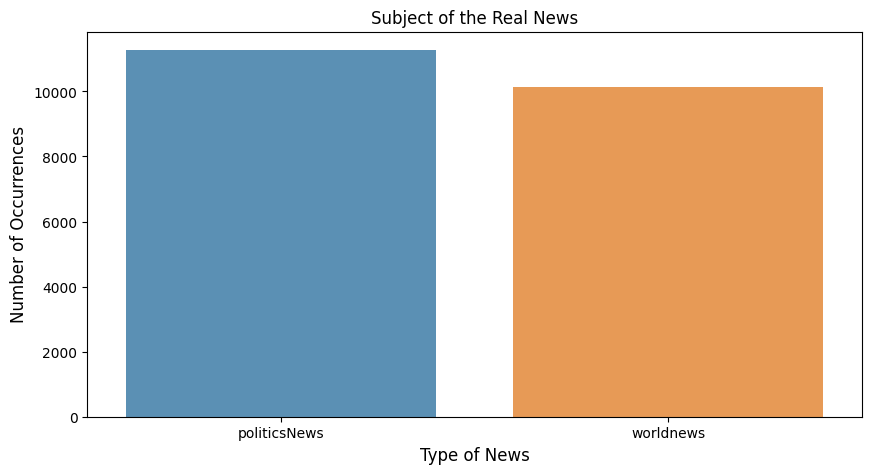

In [ ]:
import seaborn as sns
real_subject_count=real_news['subject'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=real_subject_count.index, y=real_subject_count.values, alpha = 0.8)
plt.title('Subject of the Real News')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of News', fontsize=12)
plt.show()

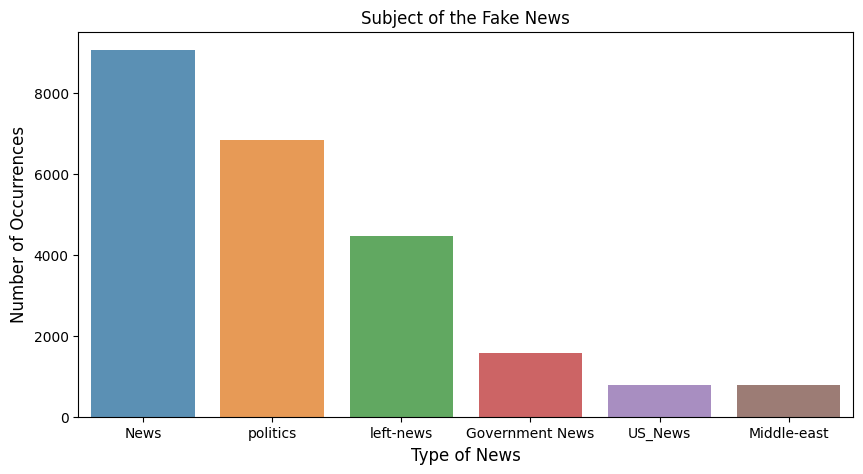

In [ ]:
fake_subject_count=fake_news.subject.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x= fake_subject_count.index, y = fake_subject_count.values, alpha=0.8)
plt.title('Subject of the Fake News')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of News', fontsize=12)
plt.show()

<Axes: xlabel='count', ylabel='subject'>

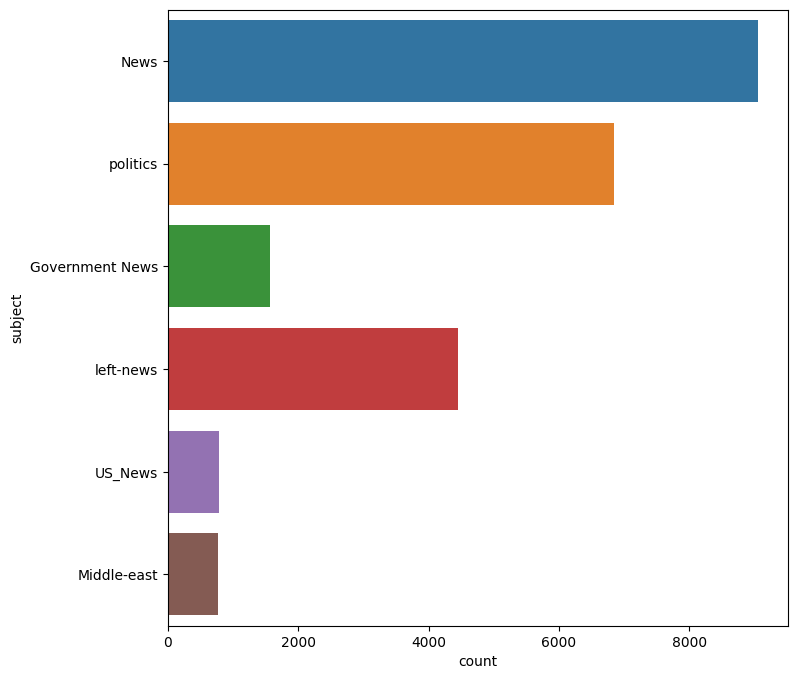

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='subject', data = fake_news)

<Axes: xlabel='count', ylabel='subject'>

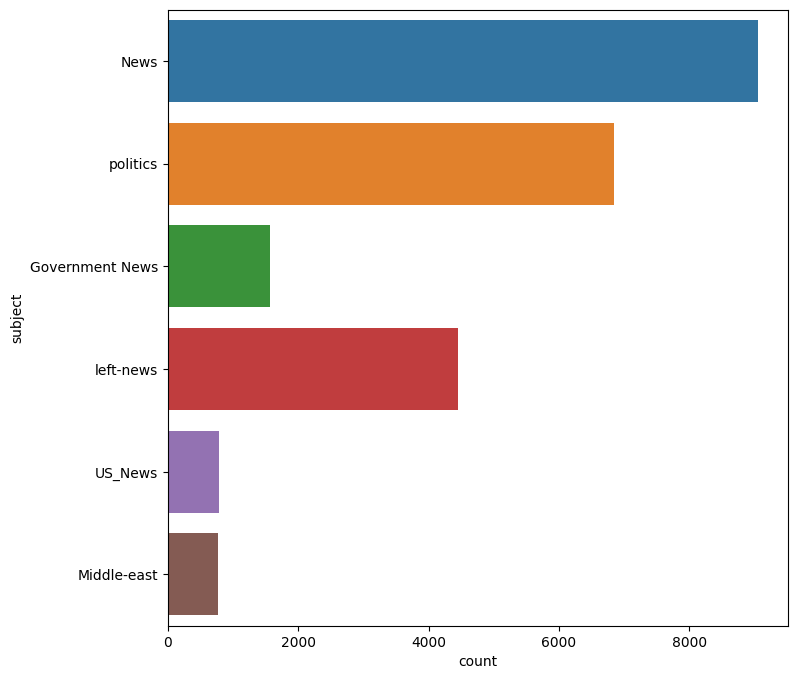

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='subject', data = fake_news)

In [ ]:
# Getting the data having politics as subject

real_news1=real_news[real_news['subject']=='politicsNews']
fake_news1=fake_news[fake_news['subject'].isin(['politics','Government News', 'US_News'])].reset_index(drop=True)

In [ ]:
fake_news1.subject.value_counts(), real_news1.subject.value_counts()

(politics           6841
 Government News    1570
 US_News             783
 Name: subject, dtype: int64,
 politicsNews    11272
 Name: subject, dtype: int64)

In [ ]:
# checking if there is empty rows in real news
empty_real_index = [index for index,text in enumerate(real_news1.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_real_index)}")
real_news1.iloc[empty_real_index].tail()

No of empty rows: 1


,title,text,subject,date
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016"


In [ ]:
# checking for the same in fake news
empty_fake_index = [index for index,text in enumerate(fake_news1.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_fake_index)}")
fake_news1.iloc[empty_fake_index].tail()

No of empty rows: 480


,title,text,subject,date
8312,(VIDEO)MILWAUKEE SHERIFF DAVID CLARKE HAMMERS ...,,Government News,"May 8, 2015"
8323,BLACK REPUBLICAN AND BRILLIANT NEUROSURGEON AN...,,Government News,"May 5, 2015"
8325,(VIDEO)INCREDIBLE ACCOUNT FROM SHERIFF MICHAEL...,,Government News,"May 4, 2015"
8337,(VIDEO) RIOTERS TAKE SELFIES WITH TORCHED POLI...,,Government News,"Apr 27, 2015"
8368,TREY GOWDY TO DEA CHIEF ON MISCONDUCT: “WHAT T...,,Government News,"Apr 14, 2015"


In [ ]:
# since it is only one row we can remove it
# dropping this row in real set
real_news1 = real_news1.drop(8970, axis=0)

In [ ]:
empty_real_index = [index for index,text in enumerate(real_news1.text.values) if str(text).strip() == '']
print(f"No of empty rows: {len(empty_real_index)}")
real_news1.iloc[empty_real_index].tail()

No of empty rows: 0


,title,text,subject,date


In [ ]:
# Get the substring in pandas 
# getting a the source from each text 
real_news1['source'] =real_news1.text.str.slice(10, 20)
print(real_news1)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
11267  Obama says willing to work with Republican Spe...   
11268  Obama says Islamic State fight far from 'World...   
11269  Chelsea Clinton stands her mother's ground in ...   
11270  Obama jokes about a Trump State of the Union a...   
11271  Clinton expands on plan to tax wealthy as Sand...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv... 

In [ ]:
# #creating label for fake and real news
real_news1['label']=1
fake_news1['label']=0

In [ ]:
#Appending the two dataframe
df = real_news1.append(fake_news1, ignore_index=True)

<ipython-input-16-51c8d90f7fbb>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = real_news1.append(fake_news1, ignore_index=True)


In [ ]:
df.head()

,title,text,subject,date,source,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",(Reuters),1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",(Reuters),1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",(Reuters),1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",(Reuters),1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",SHINGTON (,1


In [ ]:
# read in our data and preprocess it

df.drop(labels=['text','subject','date','source'], axis='columns', inplace=True)
# only select stories with lengths gt 0 -- there are some texts with len = 0
mask = list(df['title'].apply(lambda x: len(x) > 0))
df = df[mask]

In [ ]:
# Removing stopwords

from gensim.parsing.preprocessing import remove_stopwords
def stopword_removal(row):
    text = row['title']
    text = remove_stopwords(text)
    return text

In [ ]:
# Converting text into smaller letters.

df['title'] = df['title'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

<ipython-input-20-58dd7690d7e4>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [ ]:
df['title'] = df.apply(stopword_removal, axis=1)

In [ ]:
# prepare text samples and their labels

texts = df['title']
labels = df['label']

print('Found %s texts.' %texts.shape[0])

Found 20465 texts.


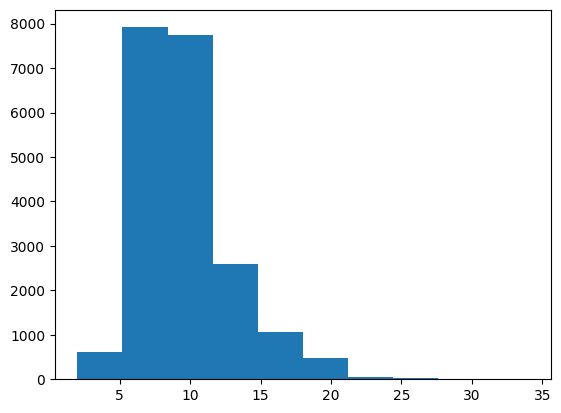

In [ ]:
# plot the distribution of article lengths in terms of word counts

text_lengths = texts.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

In [ ]:
MAX_SEQUENCE_LENGTH = 700
MAX_NUM_WORDS = 1000
EMBEDDING_DIM = 64
TEST_SPLIT = 0.2

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00


In [ ]:
# vectorize the text samples into a 2D integer tensor 

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
data = pad_sequences(sequences, 
                     maxlen=MAX_SEQUENCE_LENGTH, 
                     padding='pre', 
                     truncating='pre')

print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 15208 unique tokens.
Shape of data tensor: (20465, 700)
Shape of label tensor: (20465,)


In [ ]:
# split the data into a training set and a validation set   

from sklearn.model_selection import train_test_split



x, x_test, y, y_test = train_test_split(data, 
                                        labels, 
                                        test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y, 
                                                  test_size=0.1
                                                 
                                                  )



In [ ]:
x_train.shape

(14734, 700)

In [ ]:
x_val.shape

(1638, 700)

In [ ]:
x_test.shape

(4093, 700)

In [ ]:
from keras.layers.reshaping.flatten import Flatten
from keras.layers.pooling.max_pooling1d import MaxPool1D
from keras.models import Sequential, Model
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, multiply, Permute, Lambda
from keras import backend as K
# Defining the model architecture
# part 1: word and sequence processing
model = Sequential()
# defining embedding layer where embedding dimension/ vector size is defined as 64 and input length is set as 700. Where num_words are unique words.
model.add(Embedding(input_dim = len(word_index),
                         output_dim = EMBEDDING_DIM, 
                         input_length=MAX_SEQUENCE_LENGTH))
# for defining convolutional layer, number of filters are set as 32 and kernal size is defined as 1 X 5.
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
# maxpooling1d layer is used to take maximum values from representation.
model.add(MaxPool1D(2))
# dropout value is 0.4
model.add(Dropout(rate=0.4))

# creating second convolutional layer with kernal size 1 X 3, and number of filters will be 16. Where activation function will remain same as ReLU.
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
# creating maxpooling layer with 2 neurons so that will compare with neighbour neuron and will take max value and also setting strides value as 2.
model.add(MaxPool1D(2, strides=2))

# adding one more convolutional layer with kernal size 1 X 3, and number of filters will be 8 and setting strides value as 2. Where activation function will be ReLU.
model.add(Conv1D(filters=8, kernel_size=3, activation='relu', strides= 2))
# adding flatten layer
model.add(Flatten())


# adding dense layer with 512 neurons
model.add(Dense(units=512, activation='relu'))
# dropout value is 0.5
model.add(Dropout(rate=0.5))

# output layer contains 1 value because this is binary classification problem.
# Where activation function is 'sigmoid'.
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 64)           973312    
                                                                 
 conv1d (Conv1D)             (None, 696, 32)           10272     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 348, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 348, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 346, 16)           1552      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 173, 16)          0         
 1D)                                                    

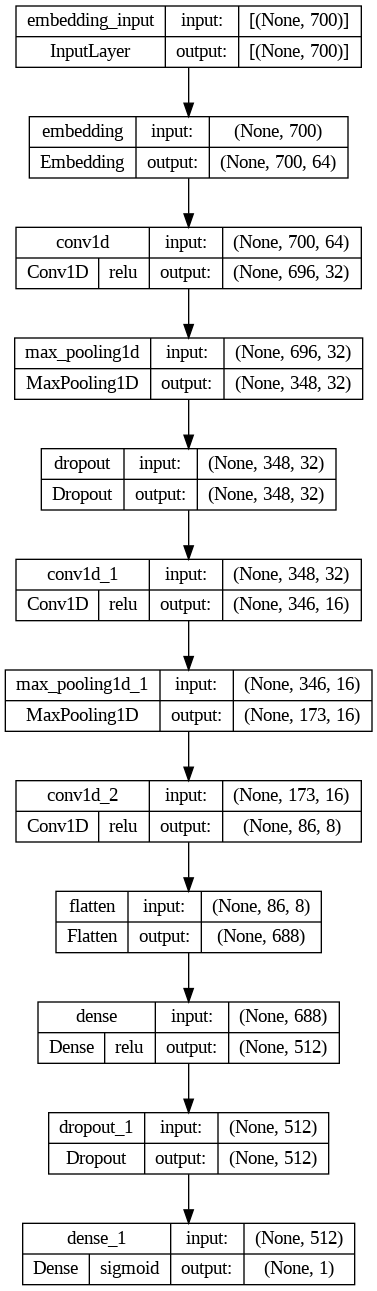

In [ ]:
# visalizing the layers of model.
import tensorflow as tf

tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
# train the model
import time as t

start= t.time()

history = model.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_val, y_val))
                    

print("Total training time:",t.time()-start)

Epoch 1/15
116/116 [==============================] - 41s 185ms/step - loss: 0.5066 - accuracy: 0.7202 - val_loss: 0.2014 - val_accuracy: 0.9188
Epoch 2/15
116/116 [==============================] - 7s 61ms/step - loss: 0.1684 - accuracy: 0.9362 - val_loss: 0.1759 - val_accuracy: 0.9328
Epoch 3/15
116/116 [==============================] - 3s 22ms/step - loss: 0.1356 - accuracy: 0.9515 - val_loss: 0.1793 - val_accuracy: 0.9335
Epoch 4/15
116/116 [==============================] - 2s 18ms/step - loss: 0.1176 - accuracy: 0.9580 - val_loss: 0.1804 - val_accuracy: 0.9280
Epoch 5/15
116/116 [==============================] - 2s 18ms/step - loss: 0.1034 - accuracy: 0.9631 - val_loss: 0.1931 - val_accuracy: 0.9286
Epoch 6/15
116/116 [==============================] - 2s 22ms/step - loss: 0.0862 - accuracy: 0.9700 - val_loss: 0.2154 - val_accuracy: 0.9304
Epoch 7/15
116/116 [==============================] - 2s 13ms/step - loss: 0.0741 - accuracy: 0.9745 - val_loss: 0.2249 - val_accuracy: 0.92

In [ ]:
!pip install keras_flops
import keras_flops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2_as_graph

In [ ]:
def get_flops(model, batch_size=None):
    if batch_size is None:
        batch_size = 1

    real_model = tf.function(model).get_concrete_function(tf.TensorSpec([batch_size] + model.inputs[0].shape[1:], model.inputs[0].dtype))
    frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(real_model)

    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    flops = tf.compat.v1.profiler.profile(graph=frozen_func.graph,
                                            run_meta=run_meta, cmd='op', options=opts)
    return flops.total_float_ops

In [ ]:
# calculating flops
flops = get_flops(model, batch_size = 256)
print(flops)
print(f"FLOPS: {flops / 10 ** 9:.03} G ")

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


4133220608
FLOPS: 4.13 G 


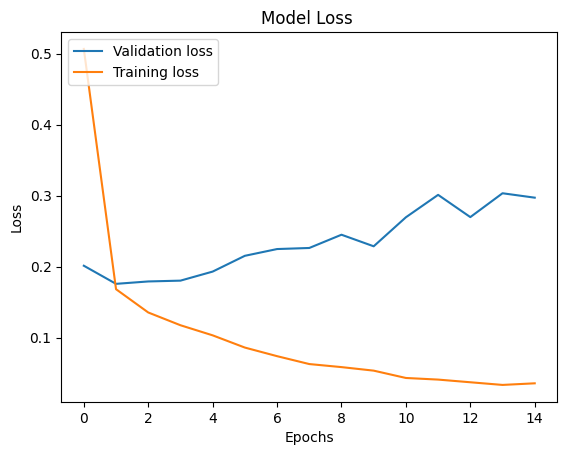

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Validation loss', 'Training loss'], loc='upper left')
plt.show()

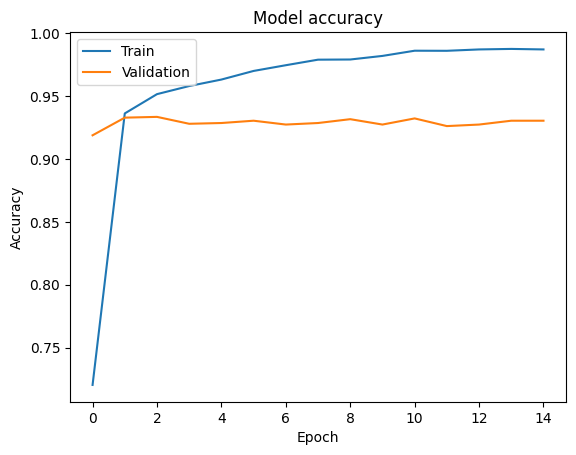

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# define a function that allows us to evaluate models

from sklearn.metrics import accuracy_score



def evaluate_model(predict_fun, X_train, y_train, X_test, y_test):
    '''
    evaluate the model, both training and testing accuraries are reported
    '''
    # training acc
    y_predict_train = predict_fun(X_train)
    train_acc = accuracy_score(y_train,y_predict_train)
    
    # testing acc
    y_predict_test = predict_fun(X_test)
    test_acc = accuracy_score(y_test,y_predict_test)
    
    return train_acc, test_acc

In [ ]:
# evaluate model

start = t.time()
train_acc, test_acc = evaluate_model(lambda x: np.rint(model.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)
print("Training Accuracy: {:.2f}%".format(train_acc*100))


128/128 [==============================] - 0s 2ms/step
Training Accuracy: 99.57%


In [ ]:

import time as t
start_time = t.time()
print("Evaluate on test data")
history1 = model.evaluate(x_test, y_test)
print("test loss, test acc:", history1)
print("Total time required for testing",t.time()-start_time)

Evaluate on test data
128/128 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.9172
test loss, test acc: [0.34660524129867554, 0.9171756505966187]
Total time required for testing 0.6925745010375977
